In [1]:
#reference : https://www.zenrows.com/blog/dynamic-web-pages-scraping-python#selecting-elements
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import io


In [2]:

driver = webdriver.Chrome(ChromeDriverManager().install())
url = 'https://www.racing.com/trainers/tony-pike-nz/form'
driver.get(url)


<html lang="en"><head><script async="" src="https://www.clarity.ms/s/0.7.20/clarity.js"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-D09593FEJ7&amp;l=dataLayer&amp;cx=c"></script><script async="" src="https://www.clarity.ms/tag/kp9uulpfgi?ref=gtm2"></script><script src="https://connect.facebook.net/signals/config/1631310827106969?v=2.9.143&amp;r=stable&amp;domain=www.racing.com&amp;hme=1e96626f56fb37feabdb16bd09d3dbece570479b2ec677eec7364c762eaf296e&amp;ex_m=62%2C104%2C92%2C96%2C53%2C3%2C88%2C61%2C14%2C86%2C79%2C44%2C46%2C146%2C149%2C160%2C156%2C157%2C159%2C25%2C89%2C45%2C68%2C158%2C141%2C144%2C153%2C154%2C161%2C113%2C13%2C43%2C165%2C164%2C115%2C16%2C29%2C32%2C1%2C36%2C57%2C58%2C59%2C63%2C83%2C15%2C12%2C85%2C82%2C81%2C93%2C95%2C31%2C94%2C26%2C22%2C142%2C145%2C122%2C24%2C9%2C10%2C11%2C5%2C6%2C21%2C19%2C20%2C49%2C54%2C56%2C66%2C90%2C23%2C67%2C8%2C7%2C71%2C41%2C18%2C17%2C4%2C73%2C80%2C72%2C78%2C40%2C39%2C77%2C33%2C35%2C76%2C48%2C74%2C
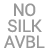
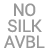
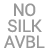
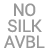
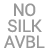
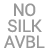
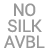
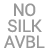
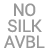
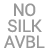
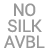
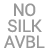
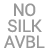

In [3]:


print(driver.page_source)

In [5]:

from selenium.webdriver.common.by import By
elements = driver.find_elements(By.TAG_NAME, 'table') 
trainers_form_races = [trainers_elements.text for trainers_elements in elements]
#print(trainers_names)
trainers_form_races


["POS\nHORSE/TRAINER/JOCKEY\nTRACK/DATE\nDIST/COND\nPRIZE/CLASS\nWGT\n800M/400M\nMARGIN\nRATING\nODDS\nCOM\n7-18\n14. Cheval D'or (NZ) (17)\nT: \nA.W.Pike\n  J: \nM.J.McNab\nE FM R8\n03 JUN 23\n2200M\nGood 4\n$700K\nG1 QLD OAKS\n56.5kg\n6th / 4th\n6.49L\n84\n$15\nSP\n1-6\nBabylon Berlin (6)\nT: \nA.W.Pike\n  J: \n - \nTE R R3\n04 MAR 23\n1200M\nGood 4\n$93.1K\nG3 KINGS PLATE\n54kg\n-\n-\n-\n$1.1\nSP\n2-12\nBabylon Berlin (9)\nT: \nA.W.Pike\n  J: \n - \nTE R R8\n11 FEB 23\n1400M\nGood 4\n$279.3K\nG1 BCD GRP SPRINT\n57kg\n-\n4.5L\n-\n$8.5\nSP\n1-11\nNot Guilty (NZ)\nT: \nA.W.Pike\n  J: \nM.J.McNab\nTE R R3\n11 FEB 23\n1200M\nGood\n$46.5K\nRATING 75\n59kg\n-\n-\n-\n$3.5\nSP\n2-11\nRuach (NZ)\nT: \nA.W.Pike\n  J: \nJ.K.Riddell\nTE R R2\n18 JAN 23\n1500M\nGood\n$13K\nRATING 75\n58kg\n-\n0.2L\n-\n$7\nSP\n2-11\nBabylon Berlin (8)\nT: \nA.W.Pike\n  J: \n - \nTREN R8\n14 JAN 23\n1200M\nGood 4\n$325.8K\nG1 TELEGRAPH\n56.5kg\n-\n0.4L\n-\n$3.7\nSP\n2-10\nBabylon Berlin (2)\nT: \nA.W.Pike\n  J: \n 

we have the names of the trainers, now we can loop trough them, access the page of each and get their info, but before that, let's define the table making roadmap:

- Split the Data: First, split the string into individual entries based on a unique pattern. In this case, it seems each entry starts with a position like "7-18".

- Parse Each Entry: For each entry, further split the information into its respective columns. This might involve identifying specific patterns or separators in the text.

- Create a Data Structure: Store the parsed data in a structured format like a list of dictionaries or a list of lists, which can then be easily converted into a DataFrame.

- Convert to DataFrame: Use pandas to convert this structured data into a DataFrame for easier manipulation and analysis.

In [8]:
trainers_form_races[0].find('-')

96

Ready for a random knowledge? that number into parentheses after the horse's name is represents the barrier draw or gate for that horse. 

In [29]:
import pandas as pd
import re

# Example function to parse each entry
def parse_entry(entry):
    lines = entry.split('\n')
    return {
        "Position": lines[0],
        "Horse": lines[1],
        "Trainer": lines[3].strip('T: '),
        "Jockey": lines[5].strip('J: '),
        "Track": lines[6],
        "Date": lines[7],
        "Distance": lines[8],
        "Condition": lines[9],
        "Prize":lines[10],
        "Class":lines[11],
        "WGT":lines[12],
        "Pos_800_400":lines[13],
        "Margin":lines[14],
        "Rating":lines[15],
        "Odds":lines[16]
    }

# Split the data into individual entries
# Assuming each entry starts with a pattern like '7-18' followed by a horse name
entries = re.split(r'\n(?=\d+-\d+\n)', trainers_form_races[0])[1:]  # [1:] to skip the header

# Parse each entry
parsed_data = [parse_entry(entry) for entry in entries]

# Create DataFrame
df = pd.DataFrame(parsed_data)

print(df)


   Position                       Horse   Trainer              Jockey  \
0      7-18   14. Cheval D'or (NZ) (17)  A.W.Pike           M.J.McNab   
1       1-6          Babylon Berlin (6)  A.W.Pike                   -   
2      2-12          Babylon Berlin (9)  A.W.Pike                   -   
3      1-11             Not Guilty (NZ)  A.W.Pike           M.J.McNab   
4      2-11                  Ruach (NZ)  A.W.Pike          .K.Riddell   
5      2-11          Babylon Berlin (8)  A.W.Pike                   -   
6      2-10          Babylon Berlin (2)  A.W.Pike                   -   
7      2-10          Babylon Berlin (8)  A.W.Pike    K.Hannan (anull)   
8       1-7                  Letzbeglam  A.W.Pike                   -   
9     13-14       2. Catalyst (NZ) (13)  A.W.Pike            D.M.Lane   
10     1-12          Surely Sacred (NZ)  A.W.Pike  M.Chadwick (anull)   
11    11-14          10. Letzbeglam (2)  A.W.Pike            K.McEvoy   
12     9-11       9. Babylon Berlin (5)  A.W.Pike  

In [21]:
df.to_csv('previous_races.csv',index=False)